<a href="https://colab.research.google.com/github/Nagore2021/Bravo/blob/main/Datamecum_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Librerías
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import seaborn.objects as so


#Regresion 
#===============================================================================
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

**Cargamos los datos**

In [2]:
Ruta = ''
data = pd.read_excel(Ruta+'entrenamiento.xlsx')


,Area,Emayor,Emenor,Exc,Vol,Rat,Perim,Clase
0,100928.0,465.179920,287.015714,1.786964,105549.0,1.686193,1310.510,B
1,77622.0,460.142902,226.581322,1.870360,82990.0,1.651213,1205.141,B
2,57612.0,352.441365,210.064210,1.802965,58810.0,1.647719,934.684,A
3,75166.0,406.690687,243.032436,1.801805,78789.0,1.684130,1121.786,A
4,80437.0,449.454581,232.325506,1.856043,84460.0,1.674236,1176.305,A


In [3]:
data.head(5)

,Area,Emayor,Emenor,Exc,Vol,Rat,Perim,Clase
0,100928.0,465.179920,287.015714,1.786964,105549.0,1.686193,1310.510,B
1,77622.0,460.142902,226.581322,1.870360,82990.0,1.651213,1205.141,B
2,57612.0,352.441365,210.064210,1.802965,58810.0,1.647719,934.684,A
3,75166.0,406.690687,243.032436,1.801805,78789.0,1.684130,1121.786,A
4,80437.0,449.454581,232.325506,1.856043,84460.0,1.674236,1176.305,A


In [4]:
data.tail(5)

,Area,Emayor,Emenor,Exc,Vol,Rat,Perim,Clase
715,86545.0,350.127874,315.719520,1.432307,87512.0,1.785887,1070.062,A
716,55114.0,317.172325,222.753453,1.711871,56849.0,1.714254,909.604,A
717,83800.0,440.833740,245.381880,1.830760,86346.0,1.657162,1170.091,B
718,84539.0,441.528890,248.374317,1.826775,87728.0,1.687577,1169.983,A
719,126515.0,595.342557,277.909293,1.884360,NaN,1.712977,1461.111,B


**Análisis Exploratorio de los datos
- cuántos registros 
- cuántas características tiene el conjunto de datos
- como los valores nulos y los tipos de datos de las distintas columnas

In [5]:
print("La base de datos tiene {} observaciones y {} columnas .".format(data.shape[0],data.shape[1]))
print("Los valores faltantes en cada columna son:\n{}".format(data.isnull().sum()))
print("Los tipos de datos de cada columna son:\n{}".format(data.dtypes))

La base de datos tiene 720 observaciones y 8 columnas .
Los valores faltantes en cada columna son:
Area      39
Emayor    34
Emenor    37
Exc       44
Vol       43
Rat       40
Perim     47
Clase      0
dtype: int64
Los tipos de datos de cada columna son:
Area      float64
Emayor    float64
Emenor    float64
Exc       float64
Vol       float64
Rat       float64
Perim     float64
Clase      object
dtype: object


In [6]:
data.Clase = data.Clase.astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Area    681 non-null    float64 
 1   Emayor  686 non-null    float64 
 2   Emenor  683 non-null    float64 
 3   Exc     676 non-null    float64 
 4   Vol     677 non-null    float64 
 5   Rat     680 non-null    float64 
 6   Perim   673 non-null    float64 
 7   Clase   720 non-null    category
dtypes: category(1), float64(7)
memory usage: 40.3 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,681.0,88262.286344,38589.316130,25387.000000,60199.000000,79735.000000,105053.000000,235047.000000
Emayor,686.0,431.197846,115.843789,225.629541,345.601388,409.213840,496.804625,997.291941
Emenor,683.0,255.521046,49.624764,143.710872,219.586405,248.606869,286.957802,440.497127
Exc,676.0,1.781422,0.090054,1.348730,1.744768,1.798546,1.841674,1.962124
Vol,677.0,91020.830133,39822.725399,26139.000000,61496.000000,82555.000000,108296.000000,239093.000000
Rat,680.0,1.698053,0.053060,1.379856,1.668171,1.704924,1.733535,1.830632
Perim,673.0,1167.043938,267.437031,619.074000,970.754000,1129.072000,1313.092000,2303.690000


## Análisis univariante

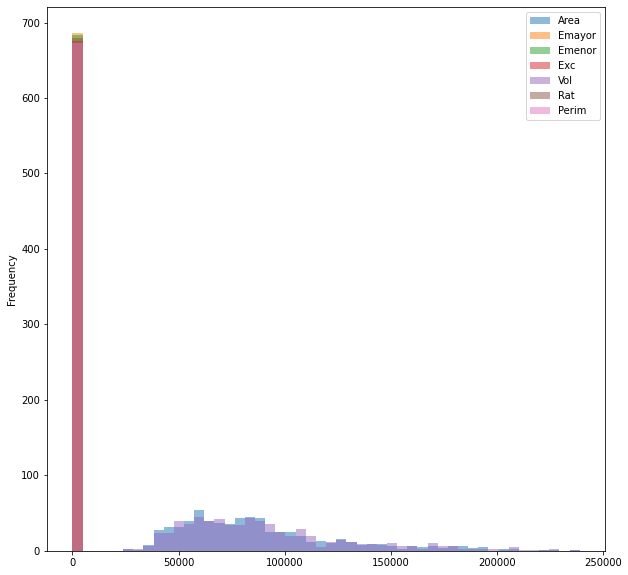

In [66]:
plt.figure(figsize=(10, 10))
data.plot.hist(bins=50, ax=plt.gca(), alpha=0.5)
plt.show()

# **SESGO**

In [72]:
pd.DataFrame(data.skew()).style.background_gradient(cmap="plasma")

<ipython-input-72-58244c1408a6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data.skew()).style.background_gradient(cmap="plasma")


,0
Area,1.157159
Emayor,0.870055
Emenor,0.652404
Exc,-1.390112
Vol,1.127781
Rat,-1.101462
Perim,0.812233


# **KURTOSIS**

In [73]:
pd.DataFrame(data.kurt()).style.background_gradient(cmap="plasma")

<ipython-input-73-dbb9f79e20d0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data.kurt()).style.background_gradient(cmap="plasma")


,0
Area,1.059180
Emayor,0.789054
Emenor,0.423626
Exc,2.841782
Vol,0.979255
Rat,3.244730
Perim,0.693695


In [74]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, minimal=True, title="Profiling Report: Flights Dataset")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**CLASE**

In [ ]:
#observamos que las clases están balanceadas
data.Clase.value_counts(normalize=True)  #observaciones de cada clase

B    0.502778
A    0.497222
Name: Clase, dtype: float64

In [17]:
(data 
  .groupby("Clase")
  .agg(frequency=("Clase", "count")))

,frequency
Clase,
A,358
B,362


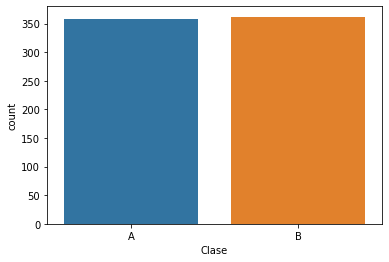

B    0.502778
A    0.497222
Name: Clase, dtype: float64

In [37]:
sns.countplot(x=data.Clase)
plt.show()

data.Clase.value_counts(normalize=True)

In [36]:
(
    so.Plot(data=df,x=pd.cut(data.Area, 5).value_counts(normalize=True),y='Emenor',color='Clase',marker='Clase')
   
    .add(linestyle='Clase',mark=so.Line())
    .label(
    #     #x="Body mass (g)", y="",
         title="Beneficios en dos bancos"   
    )
    .add(mark=so.Dot())
    .scale(
         marker=so.Nominal(["o", "v"],order=["X", "Y"]),
         color=so.Nominal(["g", "r"],order=["X", "Y"])
      ) 
  
)
  


/usr/local/lib/python3.9/dist-packages/seaborn/_core/data.py:258: RuntimeWarning: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)
/usr/local/lib/python3.9/dist-packages/seaborn/_core/data.py:258: RuntimeWarning: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)
/usr/local/lib/python3.9/dist-packages/seaborn/_core/data.py:258: RuntimeWarning: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)
/usr/local/lib/python3.9/dist-packages/seaborn/_core/data.py:258: RuntimeWarning: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)


IndexError: ignored

# **Visualizazión de los datos**

##AREA#
El valor mínimo del área es de es de 25387, mientras que el máximo se sitúa en torno a los 193.000, con valores atípicos que llegan 235047   
- El rango intercuartil (IQR) está entre 235047 y 105053.
- El área es una distribución sesgada a la derecha.
- Media : 88262
- %5,4 de valores  nulos


In [76]:
data["Area"].isnull().sum()/data.shape[0]

0.05416666666666667

In [54]:
Area_cut = pd.cut(data.Area, 5)
Area_qcut = pd.qcut(data.Area, 5)

print(data.Area)
print(Area_cut)
print(Area_qcut)

0      100928.0
1       77622.0
2       57612.0
3       75166.0
4       80437.0
         ...   
715     86545.0
716     55114.0
717     83800.0
718     84539.0
719    126515.0
Name: Area, Length: 720, dtype: float64
0       (67319.0, 109251.0]
1       (67319.0, 109251.0]
2       (25177.34, 67319.0]
3       (67319.0, 109251.0]
4       (67319.0, 109251.0]
               ...         
715     (67319.0, 109251.0]
716     (25177.34, 67319.0]
717     (67319.0, 109251.0]
718     (67319.0, 109251.0]
719    (109251.0, 151183.0]
Name: Area, Length: 720, dtype: category
Categories (5, interval[float64, right]): [(25177.34, 67319.0] < (67319.0, 109251.0] <
                                           (109251.0, 151183.0] < (151183.0, 193115.0] <
                                           (193115.0, 235047.0]]
0       (87524.0, 115272.0]
1        (71800.0, 87524.0]
2        (56837.0, 71800.0]
3        (71800.0, 87524.0]
4        (71800.0, 87524.0]
               ...         
715      (71800.0, 87524.0

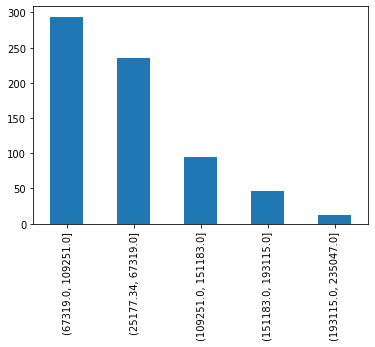

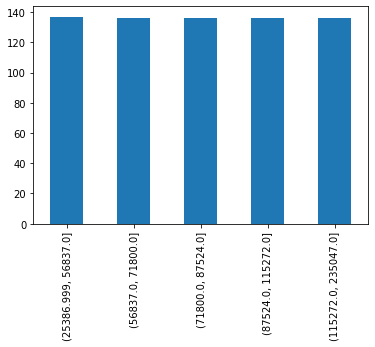

In [55]:
Area_cut.value_counts().plot.bar()
plt.show()

Area_qcut.value_counts().plot.bar()
plt.show()

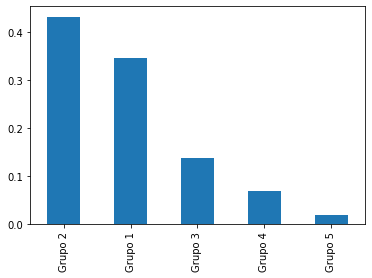

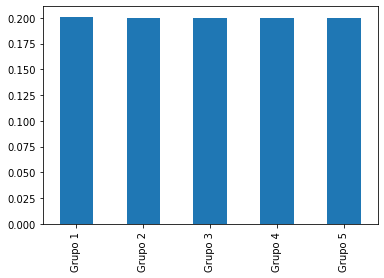

In [65]:
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5']

Area_cut = pd.cut(data.Area, 5, labels=labels)
Area_qcut = pd.qcut(data.Area, 5, labels=labels)

Area_cut.value_counts(normalize=True).plot.bar()
plt.show()

Area_qcut.value_counts(normalize=True).plot.bar()
plt.show()

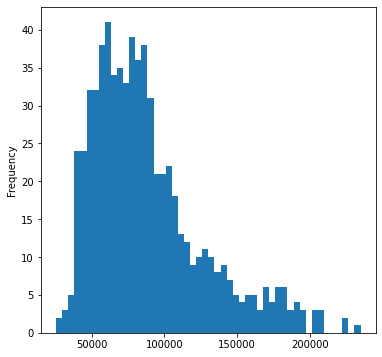

In [ ]:
plt.figure(figsize=(6,6))
data.Area.plot.hist(ax=plt.gca(), bins=50) 
plt.show()

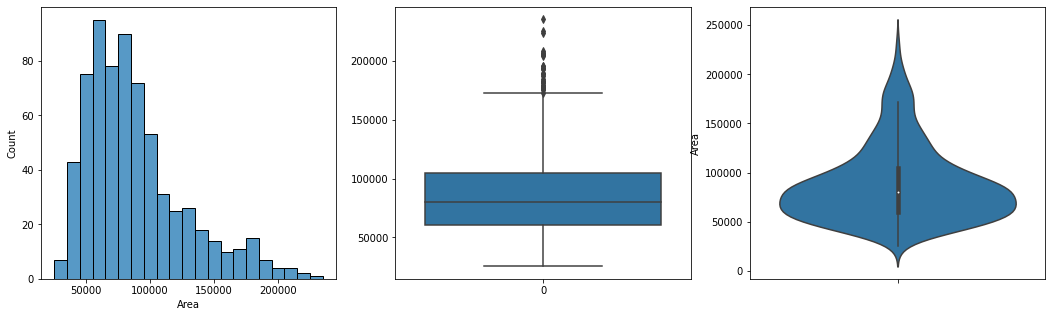

Sesgo: 1.15715949451539
Kurtosis: 1.059179796662296
Media: 88262.28634361233
Mediana: 79735.0
Desviación estandar: 38589.31613019111


In [15]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
sns.histplot(data.Area)

plt.subplot(1,3,2)
sns.boxplot(data.Area)

plt.subplot(1,3,3)
sns.violinplot(y = data.Area)

plt.show()
print('Sesgo:', data.Area.skew())

print('Kurtosis:',data.Area.kurt())


print('Media:', data.Area.mean())
print('Mediana:', data.Area.median())
print('Desviación estandar:', data.Area.std())

La clase B tiene una área mayor. En la clase A se detecta un outlier o punto de influencia

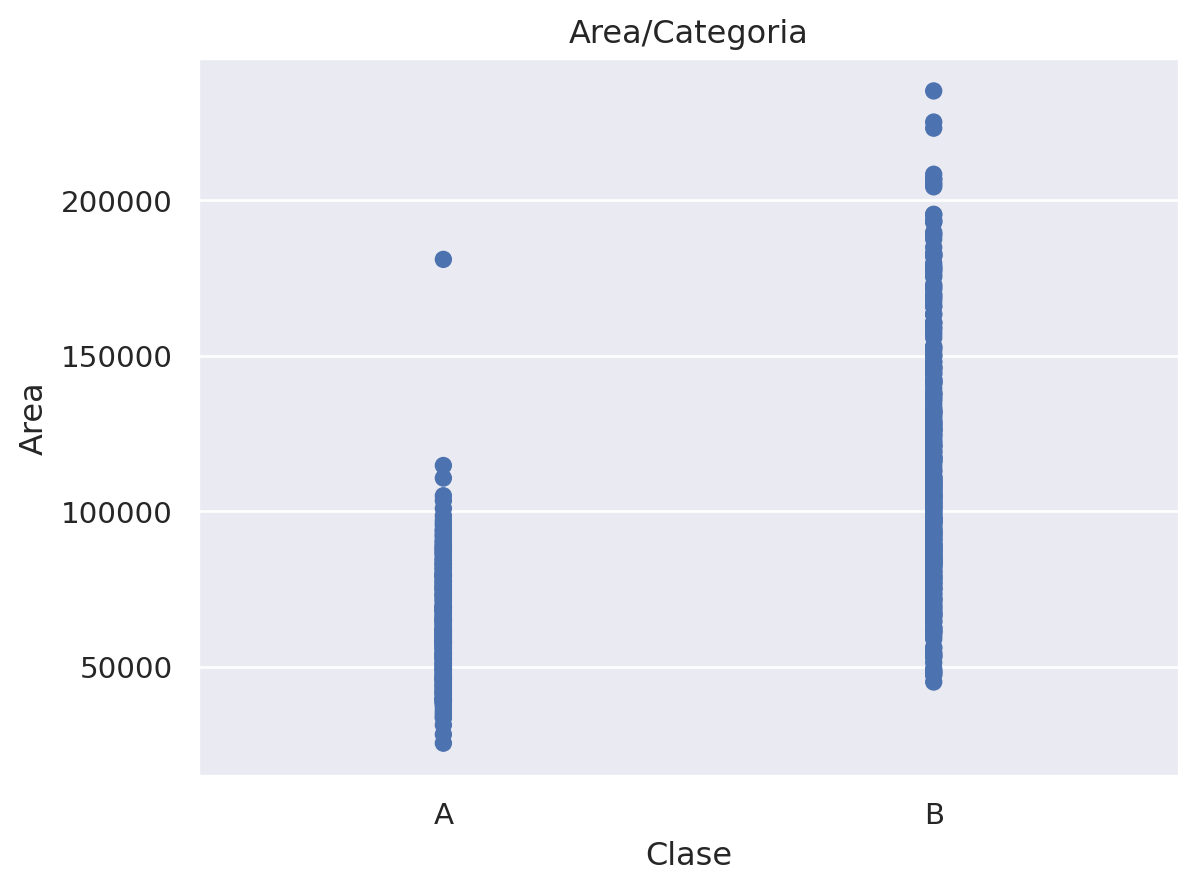

In [24]:
p=(
    so.Plot()
    .add(data=data,x='Clase',y='Area',mark=so.Dot(marker='o',color='b'))
    .label(
         title="Area/Categoria"
     )
      
)
display(p)

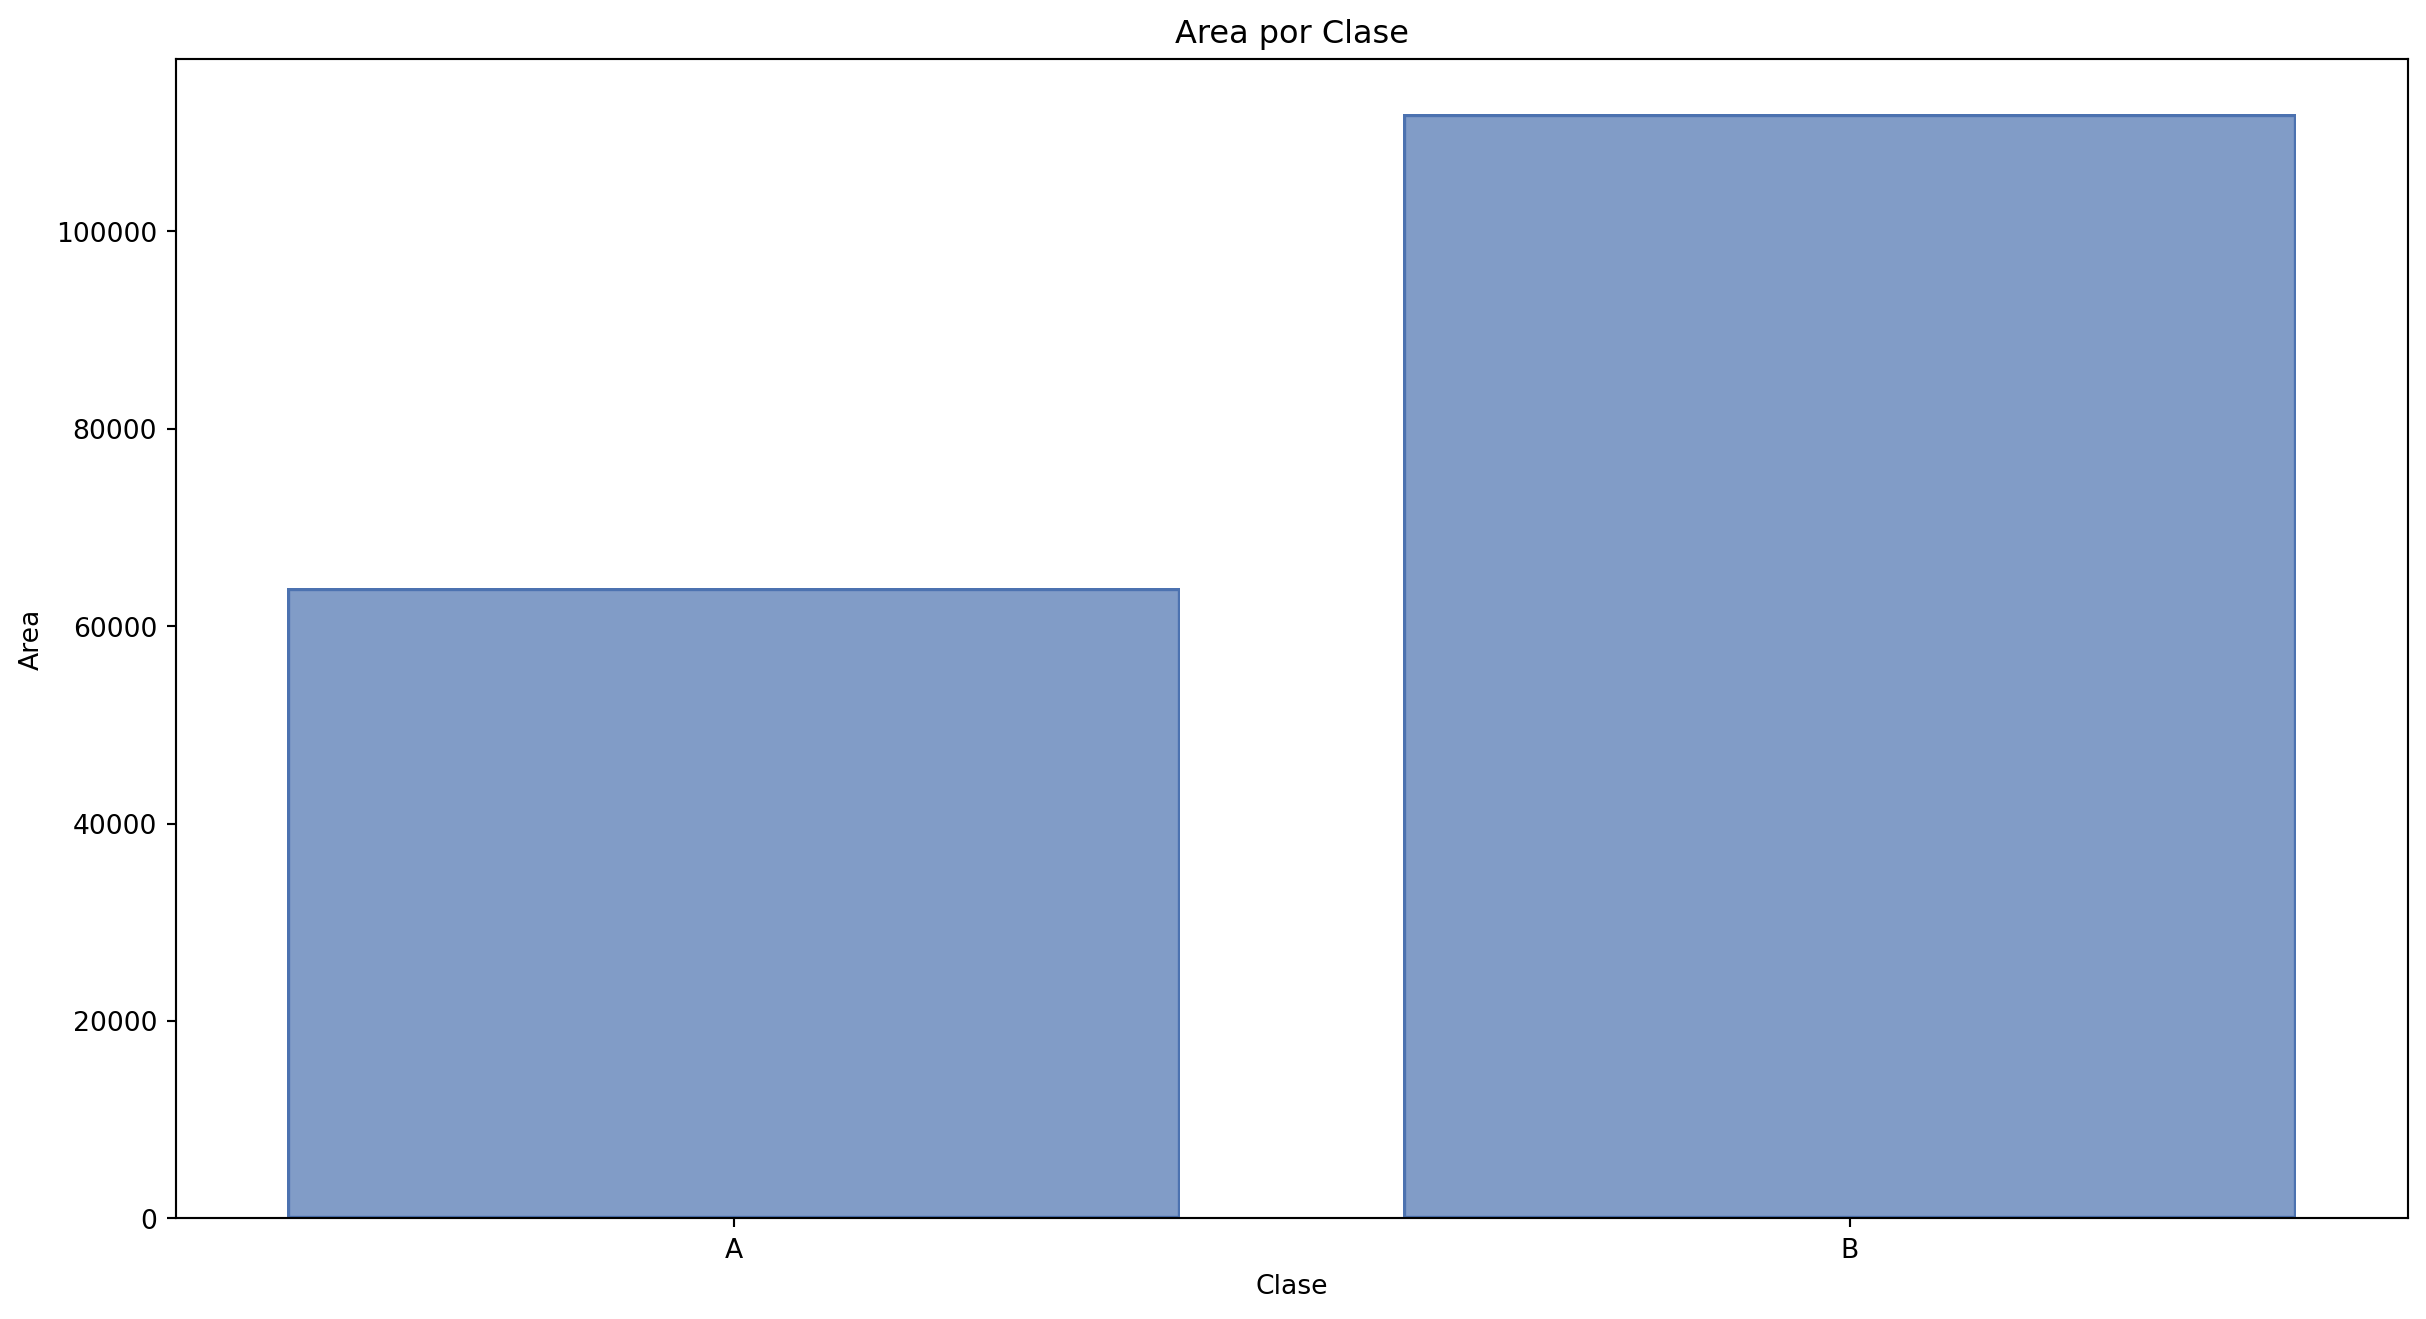

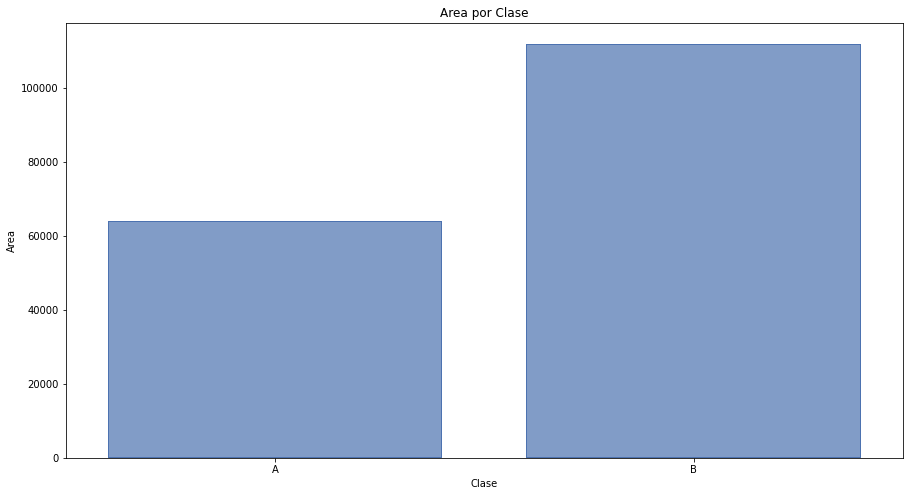

In [49]:
f,ax=plt.subplots(figsize = (15,8))
p=(
    so.Plot(data=data,x='Clase',y='Area')
    .add(so.Bar(),so.Agg()) 
    .label(
        title="Area por Clase"
    )
)


p.on(ax).plot()


In [83]:
avg_Area_by_Clase = data.groupby("Clase")["Area"].mean()

In [84]:
print(avg_Area_by_Clase)

Clase
A     63879.543284
B    111869.855491
Name: Area, dtype: float64


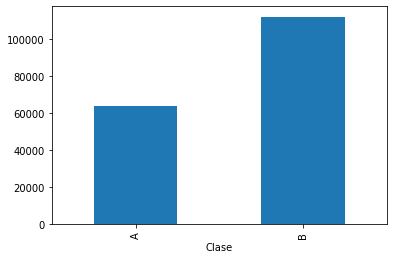

In [85]:
avg_Area_by_Clase.plot(kind='bar', title="")
plt.show()

In [56]:
Umbral= 79000
df= data.copy()
df.loc[df["Area"] >Umbral, "Area_"] = 'Area>'+str(Umbral)
df.loc[df["Area"] <=Umbral, "Area_"] = 'Area<='+str(Umbral)

In [57]:
df

,Area,Emayor,Emenor,Exc,Vol,Rat,Perim,Clase,Area_
0,100928.0,465.179920,287.015714,1.786964,105549.0,1.686193,1310.510,B,Area>79000
1,77622.0,460.142902,226.581322,1.870360,82990.0,1.651213,1205.141,B,Area<=79000
2,57612.0,352.441365,210.064210,1.802965,58810.0,1.647719,934.684,A,Area<=79000
3,75166.0,406.690687,243.032436,1.801805,78789.0,1.684130,1121.786,A,Area<=79000
4,80437.0,449.454581,232.325506,1.856043,84460.0,1.674236,1176.305,A,Area>79000
...,...,...,...,...,...,...,...,...,...
715,86545.0,350.127874,315.719520,1.432307,87512.0,1.785887,1070.062,A,Area>79000
716,55114.0,317.172325,222.753453,1.711871,56849.0,1.714254,909.604,A,Area<=79000
717,83800.0,440.833740,245.381880,1.830760,86346.0,1.657162,1170.091,B,Area>79000
718,84539.0,441.528890,248.374317,1.826775,87728.0,1.687577,1169.983,A,Area>79000


In [58]:
print(df.Area_.unique())

['Area>79000' 'Area<=79000' nan]


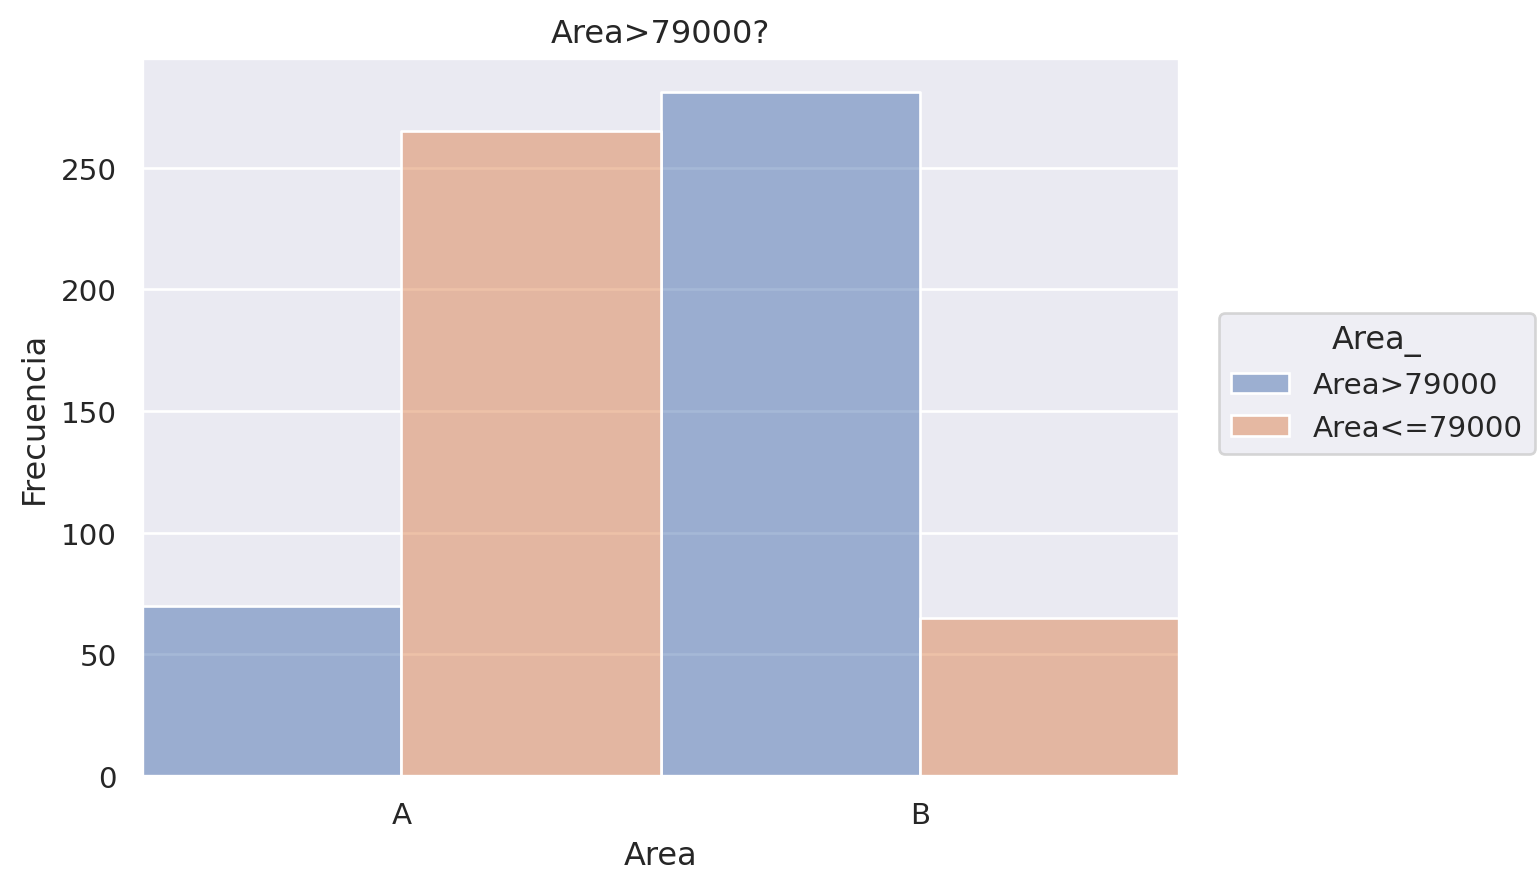

In [59]:

p=(
    
    so.Plot(data=df,x='Clase',color='Area_')
    .add(so.Bars(alpha=0.5),so.Hist(bins=6),so.Dodge()) # 2 
    .label(
        y="Frecuencia", x="Area",
        title="Area>"+str(Umbral)+'?'
    )
  
)
p

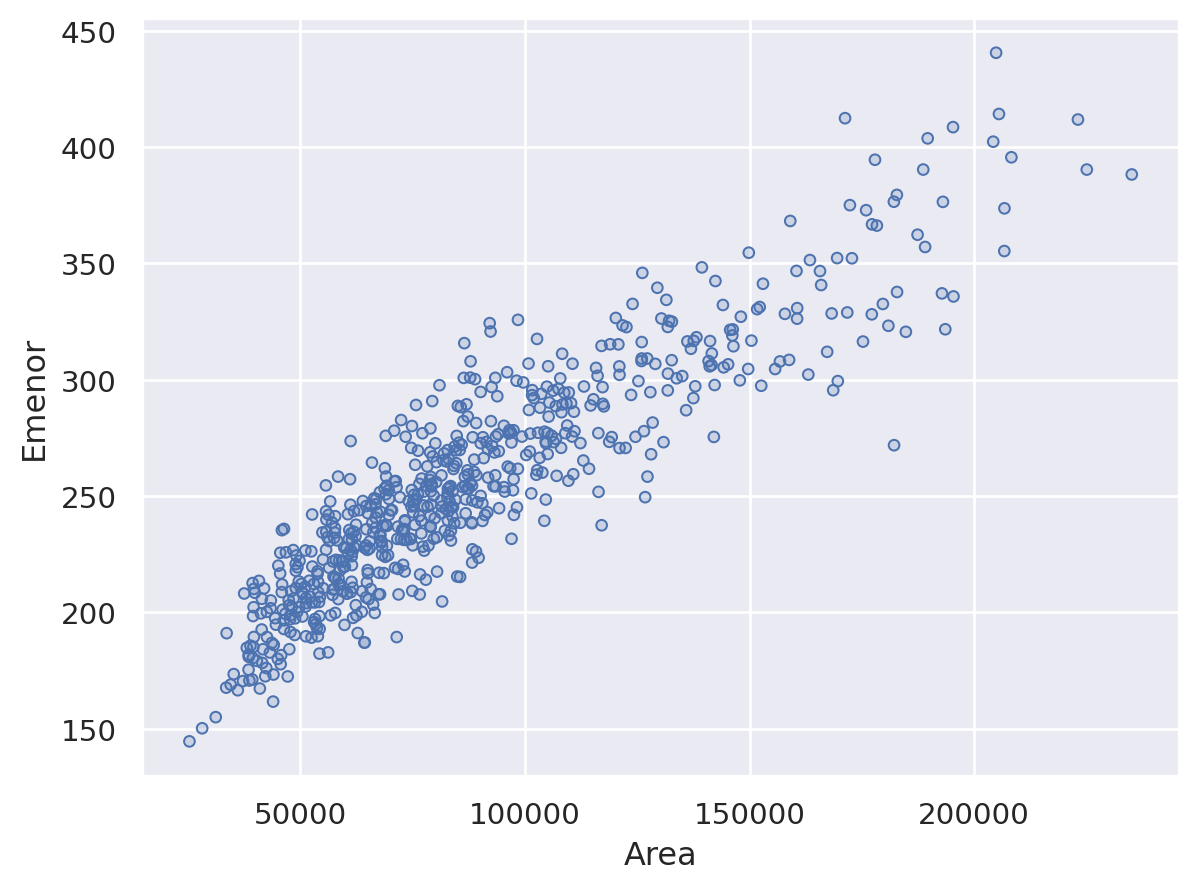

In [80]:
(
    so.Plot(data=data,x='Area',y='Emenor')
    .add(so.Dots())
    .label(
        x="Area", y="Emenor",
       
    )

)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


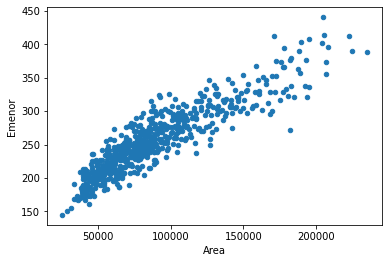

In [86]:
data.plot(x="Area", y="Emenor", kind="scatter")
plt.show()


In [82]:
modelo = smf.ols(formula = 'Clase ~ Area', data = data)
results = modelo.fit()
results.summary()

ValueError: ignored

**EMAYOR**
- Valor mínimo 225, Valor máximo alrededor de 780
- Valores atípicos hasta 997. Este valor atípcio de 997 se encuentra bastante aislado del resto de los valores atípicos
- IQR oscila entre: 345 y 496
- Media : 431
- Mediana: 
- Los valores de la variable EMAYOR están sesgados a la derecha

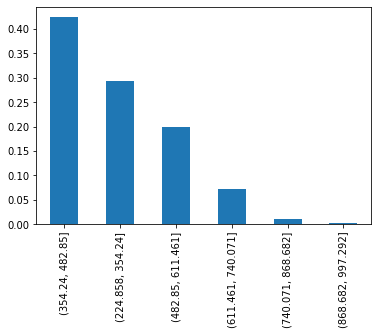

In [ ]:
pd.cut(data.Emayor, 6).value_counts(normalize=True).plot.bar()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


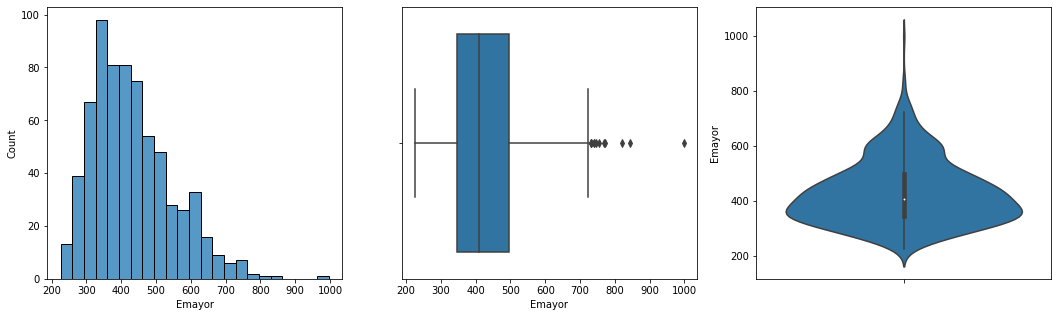

Sesgo: 0.8700546384244144
Kurtosis: 0.7890539409988548
Media: 431.1978456865889
Mediana: 409.21384
Desviación estandar: 115.84378909988824


In [ ]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
sns.histplot(data.Emayor)

plt.subplot(1,3,2)
sns.boxplot(data.Emayor)

plt.subplot(1,3,3)
sns.violinplot(y = data.Emayor)

plt.show()

print('Sesgo:', data.Emayor.skew())

print('Kurtosis:',data.Emayor.kurt())


print('Media:', data.Emayor.mean())
print('Mediana:', data.Emayor.median())
print('Desviación estandar:', data.Emayor.std())


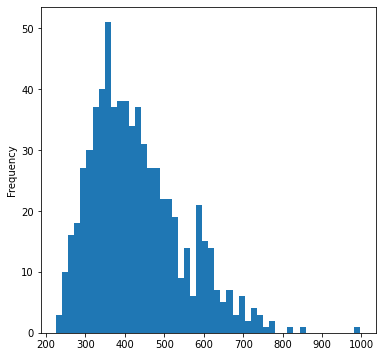

In [ ]:
plt.figure(figsize=(6,6))
data.Emayor.plot.hist(ax=plt.gca(), bins=50) 
plt.show()



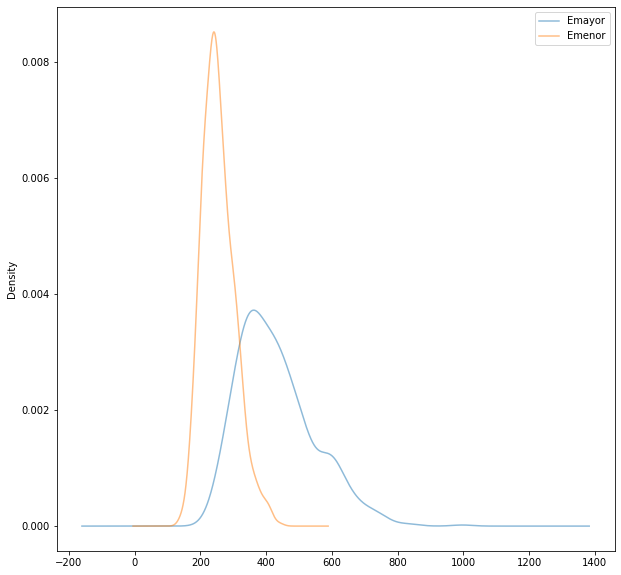

In [69]:
plt.figure(figsize=(10, 10))
data.loc[:, ['Emayor', 'Emenor']].plot.density(ax=plt.gca(), alpha=0.5)
plt.show()

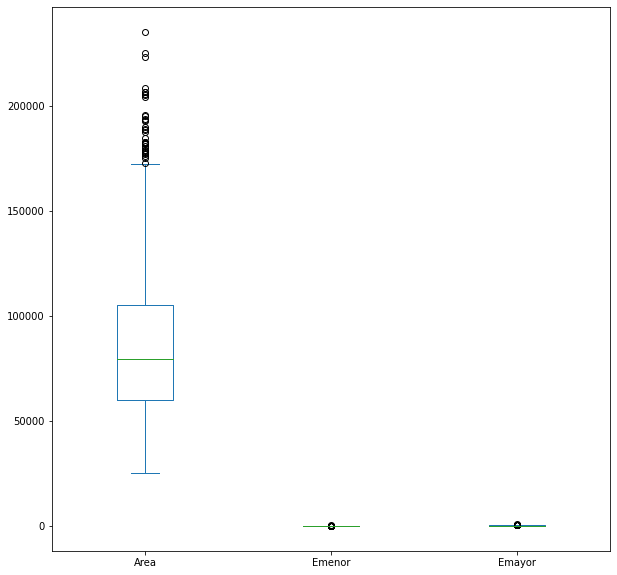

In [71]:
plt.figure(figsize=(10, 10))
data.loc[:, ['Area','Emenor', 'Emayor']].plot.box(ax=plt.gca())
plt.show()

**EMENOR**
- Valor mínimo 225, Valor máximo alrededor de 780
- Valores atípicos hasta 997. Este valor atípcio de 997 se encuentra bastante aislado del resto de los valores atípicos
- IQR oscila entre: 345 y 496
- Media : 431
- Mediana: 
- Los valores de la variable EMAYOR están sesgados a la derecha

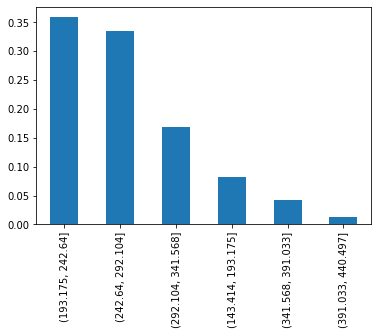

In [10]:
pd.cut(data.Emenor, 6).value_counts(normalize=True).plot.bar()
plt.show()

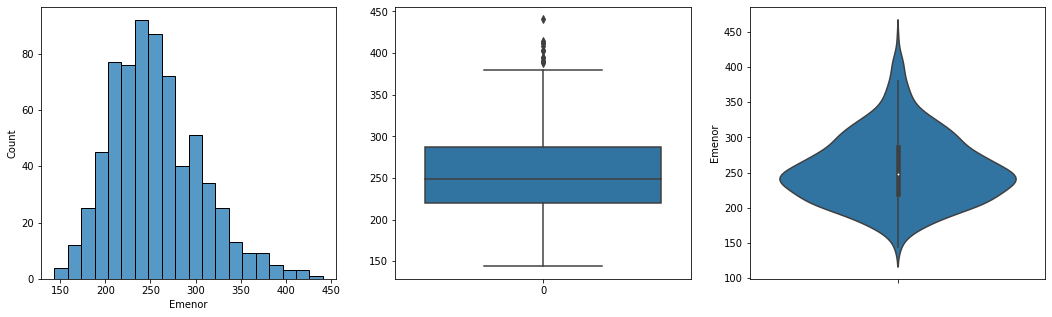

Sesgo: 0.6524037067984431
Kurtosis: 0.4236262929400292
Media: 255.5210458954612
Mediana: 248.6068692
Desviación estandar: 49.62476429818299


In [13]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
sns.histplot(data.Emenor)

plt.subplot(1,3,2)
sns.boxplot(data.Emenor)

plt.subplot(1,3,3)
sns.violinplot(y = data.Emenor)

plt.show()

print('Sesgo:', data.Emenor.skew())

print('Kurtosis:',data.Emenor.kurt())


print('Media:', data.Emenor.mean())
print('Mediana:', data.Emenor.median())
print('Desviación estandar:', data.Emenor.std())


In [ ]:
data.